Demo illustrating aggregation of traditional macroseismic data and plotting a map

In [81]:
%matplotlib notebook

Select earthquake

In [82]:
id_earth = 509
[eq] = eqcatalog.rob.query_local_eq_catalog_by_id(id_earth)

Two ways of querying MDPs from the database

In [83]:
mdp_collection = eqcatalog.rob.query_traditional_macro_catalog(id_earth)
print(mdp_collection)

<MDPCollection (n=1496)>


In [5]:
mdp_collection = eq.get_traditional_macroseismic_info()
mdp_collection

<MDPCollection (n=1496)>

In [84]:
lonmin, lonmax, latmin, latmax = mdp_collection.get_region()

Quick plot of intensity versus (hypocentral) distance

<IPython.core.display.Javascript object>


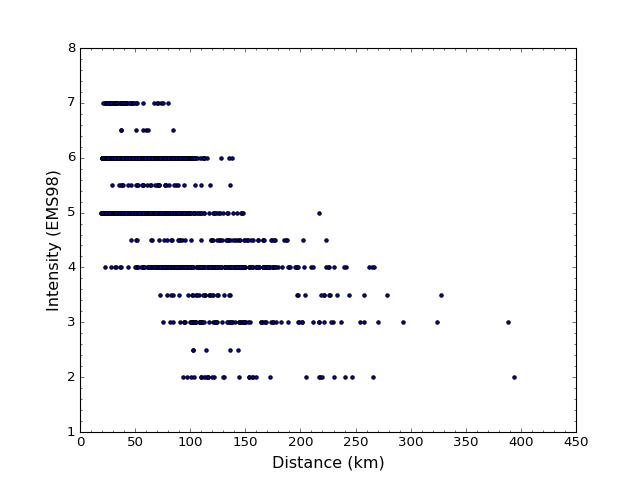

In [85]:
mdp_collection.plot_intensity_vs_distance(eq, Imin_or_max='mean')

Common aggregation parameters

In [86]:
## Which intensity assessment to use for individual MDPs: min/max/mean
Imin_or_max = 'max'
## How to aggregate intensities from multiple MDPs: min/max/mean/median
agg_function = 'mean'

Aggregation by main commune (fast, based on database)

In [49]:
agg_type = 'id_main'
agg_macro_collection = mdp_collection.aggregate_by_property(agg_type, Imin_or_max, agg_function)

Aggregation using an arbitrary set of polygons (slow, needs point-in-polygon testing)

In [87]:
giscat = seismogis.SeismoGisCatalog
coll = giscat.read_collection('STATBEL')
[ds] = coll.find_datasets('Arrondissements')
gis_filespec = ds.get_gis_filespec()
agg_macro_collection = mdp_collection.aggregate_by_polygon_data(gis_filespec, 'Objectid',
                                                                Imin_or_max, agg_function)

Number of layers: 1
Number of features in layer 0: 43


Extract geometries and convert to geojson

In [88]:
macro_geoms = agg_macro_collection.get_geometries()

In [89]:
macro_json = macro_geoms.to_geojson()

In [ ]:
import json
json.dump(macro_json, open(r'C:\Temp\macro.json', 'w'))

Plot map with folium as choropleth:
- requires panda dataframe
- incorrect handling of NaN values (fixed in v. 0.7 with 'nan_fill_color' and 'nan_fill_opacity' options

In [65]:
df = pandas.DataFrame(macro_geoms.values)
df

,Area_ha,Arrond_fr,Arrond_nl,Inhab,Nuts1,Nuts2,Nuts3_new,Objectid,Prov_fr,Prov_nl,Reg_fr,Reg_nl,agg_type,data_type,id_earth,intensity,num_replies
0,47279.31,Alost,Aalst,276535.0,BE2,BE23,BE231,1.0,Flandre Orientale,Oost-Vlaanderen,Région Flamande,Vlaams Gewest,polygon,traditional,509.0,5.855072,69
1,31885.19,Arlon,Aarlen,58428.0,BE3,BE34,BE341,2.0,Luxembourg,Luxemburg,Région Wallonne,Waals Gewest,polygon,traditional,509.0,NaN,1
2,49110.79,Ath,Aat,84474.0,BE3,BE32,BE321,3.0,Hainaut,Henegouwen,Région Wallonne,Waals Gewest,polygon,traditional,509.0,5.625000,48
3,100397.69,Anvers,Antwerpen,997827.0,BE2,BE21,BE211,4.0,Anvers,Antwerpen,Région Flamande,Vlaams Gewest,polygon,traditional,509.0,4.114286,35
4,104697.61,Bastogne,Bastenaken,45446.0,BE3,BE34,BE342,5.0,Luxembourg,Luxemburg,Région Wallonne,Waals Gewest,polygon,traditional,509.0,3.666667,3
5,58856.40,Mons,Bergen,253001.0,BE3,BE32,BE323,6.0,Hainaut,Henegouwen,Région Wallonne,Waals Gewest,polygon,traditional,509.0,5.280702,57
6,39010.97,Waremme,Borgworm,76547.0,BE3,BE33,BE334,7.0,Liège,Luik,Région Wallonne,Waals Gewest,polygon,traditional,509.0,5.500000,6
7,66526.92,Bruges,Brugge,277322.0,BE2,BE25,BE251,8.0,Flandre Occidentale,West-Vlaanderen,Région Flamande,Vlaams Gewest,polygon,traditional,509.0,4.555556,9
8,16248.30,Bruxelles-Capitale,Brussel-Hoofdstad,1118680.0,BE1,BE10,BE100,9.0,,,Région de Bruxelles-Capitale,Brussels Hoofdstedelijk Gewest,polygon,traditional,509.0,5.850000,20
9,55920.19,Charleroi,Charleroi,427084.0,BE3,BE32,BE322,10.0,Hainaut,Henegouwen,Région Wallonne,Waals Gewest,polygon,traditional,509.0,5.148148,54


In [11]:
map = folium.Map(tiles='OpenStreetMap', control_scale=True)
map.choropleth(macro_json, data=df, name='Intensity map', smooth_factor=1.0,
                key_on='feature.properties.Objectid', columns=['Objectid', 'intensity'],
                fill_color='YlOrRd', legend_name='Intensity', threshold_scale=np.arange(2.5,8))
lonmin, lonmax, latmin, latmax = mdp_collection.get_region()
map.fit_bounds([(latmin, lonmin), (latmax, lonmax)])
folium.LayerControl().add_to(map)

Plot with folium as geojson overlay:
- requires style function

In [106]:
cmap = lbm.cm.get_cmap('macroseismic', 'usgs')
dc = 1. / cmap.N / 2.
colors = cmap(np.linspace(dc, 1-dc, cmap.N))
hex_colors = [matplotlib.colors.rgb2hex(color) for color in colors]
intensity_color_dict = {i+1: hex_colors[i] for i in range(len(colors))}
style_function = lambda feature: {'color': 'black',
                                  'weight': 1,
                                  'opacity': 0.5,
                                  'fillOpacity': 0.5,
                                  'fillColor': intensity_color_dict.get(
                                              np.round(feature['properties']['intensity']),
                                              '#ffffff')}

Create color map.
Note that this color map could also be used in the style function (colormap[feature['properties']['intensity']]), but then there is no way to get a different color for values outside the valid range.

In [91]:
colormap = LinearColormap(colors=hex_colors, index=range(1, cmap.N + 1), vmin=1, vmax=9,
                          caption="Intensity")

In [107]:
map = folium.Map(tiles='OpenStreetMap', control_scale=True)
#tooltip = folium.features.GeoJsonTooltip(['Name', 'intensity', 'num_replies'])
tooltip = folium.features.GeoJsonTooltip(['Arrond_nl', 'intensity', 'num_replies'])
#tooltip = folium.features.GeoJsonTooltip(['intensity', 'num_replies'])
#tooltip = None
macro_layer = folium.features.GeoJson(macro_json, name='Intensity map', overlay=True,
                                      style_function=style_function, tooltip=tooltip,
                                      smooth_factor=1)
macro_layer.add_to(map)
lonmin, lonmax, latmin, latmax = mdp_collection.get_region()
map.fit_bounds([(latmin, lonmin), (latmax, lonmax)])
colormap.add_to(map)
folium.LayerControl().add_to(map)

Display folium map (but frequently crashes...)

In [ ]:
map

Or more safely: save folium map to html and display in another browser tab

In [108]:
map.save(r"C:\Temp\folium.html")

[View Map](file:///C:/Temp/folium.html)

In [16]:
%%html
<a href="file:///C:/Temp/folium.html">View Map</a>

Plot map using matplotlib / basemap

Found 43 aggregates (1067 replies) for event 509:


<IPython.core.display.Javascript object>


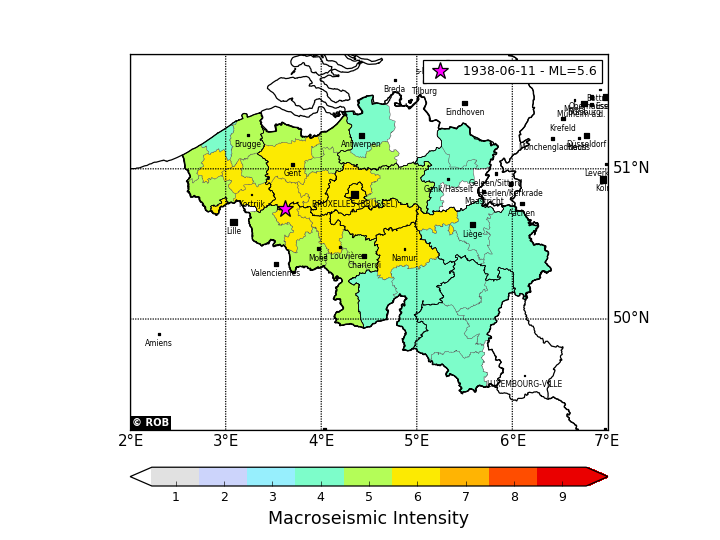

Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [66]:
agg_macro_collection.plot_map(cmap='usgs')